In [1]:
%load_ext autoreload
%autoreload 2

In [288]:
from absbox import API

asset = ["AdjustRateMortgage"
        ,{"originBalance":73_875.00
          ,"originRate":["floater",0.04,{"index":"USCMT1Y"
                                        ,"spread":0.01
                                        ,"reset":"YearFirst"}]
          ,"originTerm":360
          ,"freq":"Monthly","type":"Level","originDate":"1999-05-01"
          ,"arm":{"initPeriod":2,"firstCap":0.01,"periodicCap":0.01,"lifeCap":0.09}}
          ,{"currentBalance":20_788.41
          ,"currentRate":0.0215
          ,"remainTerm":77
          ,"status":"current"}]

from absbox.local.generic import Generic

GNMA_36208ALG4 = Generic(
    "820146/36208ALG4/G2-Custom AR"
    ,{"collect":["2023-05-01","2023-05-31"]
        ,"pay":["2023-05-26","2023-06-28"]
        ,"stated":"2070-01-01"
        ,"poolFreq":"MonthEnd"
        ,"payFreq":["DayOfMonth",20]}
    ,{'assets':[asset]}
    ,(("acc01",{"balance":0}),)
    ,(("A1",{"balance":20_899.37
             ,"rate":0.025
             ,"originBalance":1_553_836.00
             ,"originRate":0.07
             ,"startDate":"2020-01-03"
             ,"rateType":{"floater": ["USCMT1Y",0.01,"YearFirst"],"dayCount":"DC_30_360_US"}
             ,"bondType":{"Sequential":None}
             ,"lastAccrueDate":"2023-04-30"})
      ,)
    ,(("Ginnie_Mae_guaranty",
       {"type":{"annualPctFee":[("poolBalance",),0.0006]}
       ,"feeDueDate":"2023-04-26"}),
      ("service_fee",
       {"type":{"annualPctFee":[("poolBalance",)
                                ,("Max"
                                  ,("substract",("poolWaRate",),("bondRate","A1"))
                                  ,("constant",0))]}
       ,"feeDueDate":"2023-04-26"}))
    ,{"amortizing":[
         ["calcFee","Ginnie_Mae_guaranty","service_fee"]
         ,["payFee",["acc01"],['Ginnie_Mae_guaranty',"service_fee"]]
         ,["payInt","acc01",["A1"]]
         ,["payPrin","acc01",["A1"]]]
      ,"endOfCollection":[
          ["liqSupport","Ginnie_Mae","acc01"
              ,{"formula": 
                ("substract",("cumPoolDefaultedBalance",)
                            ,("liqCredit","Ginnie_Mae"))}]
          ,["calcInt","A1"]]}
    ,[["CollectedInterest","acc01"]
      ,["CollectedPrincipal","acc01"]
      ,["CollectedPrepayment","acc01"]
      ,["CollectedRecoveries","acc01"]]
    ,{"Ginnie_Mae":{"type":"Unlimited","start":"2023-05-26"}}
    ,None)

if __name__ == '__main__':
    localAPI = API("http://localhost:8081",lang='english')

    r = localAPI.run(GNMA_36208ALG4
                 ,assumptions = [{"Rate":["USCMT1Y",0.0468]}
                                ,{"CDR":0.005} 
                                ,{"Inspect":[("MonthEnd",("cumPoolDefaultedBalance",))
                                           ,("MonthEnd",("liqCredit","Ginnie_Mae"))]}]
                 ,read=True)

In [290]:
from absbox.local.chart import viz

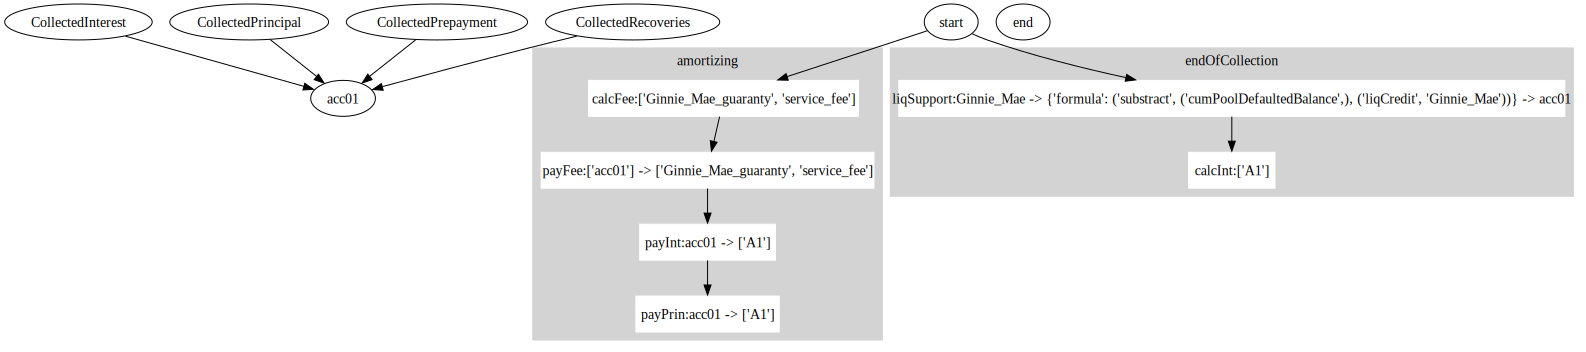

In [291]:
viz(GNMA_36208ALG4)

In [281]:
r['result']['inspect']['<CumulativePoolDefaultedBalance>']

,<CumulativePoolDefaultedBalance>
Date,
2023-05-01,0.00
2023-05-31,8.56
2023-06-30,17.30
2023-07-31,25.65
2023-08-31,34.18
...,...
2029-01-31,334.64
2029-02-28,335.19
2029-03-31,335.56


In [283]:
r['result']['inspect']['<LiqCredit:Ginnie_Mae>']

,<LiqCredit:Ginnie_Mae>
Date,
2023-05-01,0.00
2023-05-31,8.56
2023-06-30,17.30
2023-07-31,25.65
2023-08-31,34.18
...,...
2029-01-31,334.64
2029-02-28,335.19
2029-03-31,335.56


In [284]:
r['accounts']['acc01'][r['accounts']['acc01']["memo"]=="<Support:Ginnie_Mae>"]

,balance,change,memo
date,,,
2023-05-31,345.88,8.56,<Support:Ginnie_Mae>
2023-06-30,345.92,8.74,<Support:Ginnie_Mae>
2023-07-31,345.39,8.35,<Support:Ginnie_Mae>
2023-08-31,345.42,8.53,<Support:Ginnie_Mae>
2023-09-30,345.17,8.42,<Support:Ginnie_Mae>
...,...,...,...
2029-01-31,328.55,0.68,<Support:Ginnie_Mae>
2029-02-28,328.29,0.55,<Support:Ginnie_Mae>
2029-03-31,327.98,0.37,<Support:Ginnie_Mae>


In [285]:
r['pool']['flow']

,Balance,Principal,Interest,Prepayment,Default,Recovery,Loss,WAC,BorrowerNum
Date,,,,,,,,,
2023-05-31,20540.88,238.97,98.35,0,8.56,0,8.56,0.0568,None
2023-06-30,20292.13,240.01,97.17,0,8.74,0,8.74,0.0568,None
2023-07-31,20042.74,241.04,96.00,0,8.35,0,8.35,0.0568,None
2023-08-31,19792.14,242.07,94.82,0,8.53,0,8.53,0.0568,None
2023-09-30,19540.60,243.12,93.63,0,8.42,0,8.42,0.0568,None
...,...,...,...,...,...,...,...,...,...
2029-01-31,1296.15,320.22,7.65,0,0.68,0,0.68,0.0568,None
2029-02-28,973.99,321.61,6.13,0,0.55,0,0.55,0.0568,None
2029-03-31,650.61,323.01,4.60,0,0.37,0,0.37,0.0568,None
